# ID5
This Jupyter notebook shows the application of the ID5 class and its functions.

The ID5 spectrometer is one of the laboratory equipement in our research group `B-Lab`. In the following, there are nessessary functions for reading and analyzing ID5-files, calculating important values and visualizing results. 

All functions have a description, in case some input variables seem unclear. Also please notice the output prints of functions! Some functions have valuable information or error messages!

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from src import devices as blab
from scipy import optimize

### <u>Reading the files</u>

ID5-files must be saved by the user in TXT- and utf-8 format.

FRET measurements use emission and excitation wavelengths. These are not completely or incorrectly exported when writing the ID5-files. Therefore you will need to write the wavelengths into a dictionary, as shown below:

In [1]:
wavelength_pairs = {
    "Dem_Dex": [530, 595],
    "Aem_Dex": [530, 660],
    "Aem_Aex": [630, 660]
}

To use these values in the FRET calculations, they need to be passed to the ID5 function in a dictionary.
The function `ID5` is much more than just the function to read the files - but this is not relevant now. You need to know the following:
- The function requires the name of the file you would like to read and the aforementioned wavelength pairs variable as such: 
`blab.ID5(filepath, wavelength pairs variable)`

If the file has been successfully loaded, the measurements that have been read in will be displayed. The measurements are named with "Measurement_" and a consecutive number. The usage and output is shown below:


In [45]:
working_with_id5_data = blab.ID5("src/id5_data/2023-05-30_MgCl2_titration_VS.txt", wavelength_pairs)

Measurement_1 = FRET_21°C: Endpoint, Fluorescence
Measurement_2 = FRET_23°C: Endpoint, Fluorescence
Measurement_3 = FRET_25°C: Endpoint, Fluorescence
Measurement_4 = FRET_27°C: Endpoint, Fluorescence
Measurement_5 = FRET_29°C: Endpoint, Fluorescence
Measurement_6 = FRET_31°C: Endpoint, Fluorescence
Measurement_7 = FRET_33°C: Endpoint, Fluorescence
Measurement_8 = FRET_35°C: Endpoint, Fluorescence
Measurement_9 = FRET_37°C: Endpoint, Fluorescence
Measurement_10 = FRET_39°C: Endpoint, Fluorescence
Measurement_11 = FRET_41°C: Endpoint, Fluorescence
Measurement_12 = FRET_43°C: Endpoint, Fluorescence
Measurement_13 = FRET_45°C: Endpoint, Fluorescence
Measurement_14 = FRET_47°C: Endpoint, Fluorescence
Measurement_15 = FRET_49°C: Endpoint, Fluorescence
Measurement_16 = FRET_51°C: Endpoint, Fluorescence
Measurement_17 = FRET_53°C: Endpoint, Fluorescence
Measurement_18 = FRET_55°C: Endpoint, Fluorescence
Measurement_19 = FRET_57°C: Endpoint, Fluorescence
Measurement_20 = FRET_59°C: Endpoint, Fl

Summary: <u> what you need to write into your Jupyter Notebook first </u>:

1. `from src import devices as blab`
2. the correct wavelength pairs as shown above, saved in a variable
3. `blab.ID5(filepath, wavelength pairs variable)` saved in a variable



### <u>Accessing specific measurements</u>

The measurements are kept in the attribute "measurements" of the variable "my_id5_data".
This is simply a dictionary that contains all measurements.

In [46]:
print(working_with_id5_data.measurements["Measurement_1"])

When accessing Measurement 1, the result appears unusual. This is due to the fact that the measurements are saved as objects.
Objects are, in a nutshell, complex variables. They have attributes such as the measurement's name or the data in a dataframe. Furthermore, the objects include functions that can be used to improve data interaction.
You can store the measurement in a new variable and examine the name of the measurement and the data in it. The informations are stored in the "section_name" and "working_df" attribute.

Consider the following:

In [47]:
measure_1 = working_with_id5_data.measurements["Measurement_1"]

print(f"Name of the Measurement = {measure_1.section_name}")

df_of_measurement_1 = measure_1.working_df
df_of_measurement_1

Name of the Measurement = FRET_21°C


,excitation wavelength (nm),emission wavelength (nm),temperature (°C),wellnumber,RFU
0,530,595,21,A1,4220
1,530,595,21,A2,865316
2,530,595,21,A3,392148
3,530,595,21,A4,1262228
4,530,595,21,A5,781926
...,...,...,...,...,...
211,630,660,21,H5,6967
212,630,660,21,H6,5286630
213,630,660,21,H7,6248
214,630,660,21,H8,3133936


### <u>Accessing specific wells</u>

With the function `get_well()`, you can choose the well, you would like to work on and save it as a dataframe. It is a function of the objects, so that you only need to specify which wellnumber, you would like to access. 

Because this is a standard pandas DataFrame, the function `get_well()` does not exist in the dataframe "df_of_measurement_1". To access `get_well()`, you have to use the object named "measure_1".

In [48]:
df_A3 = measure_1.get_well("A3")
df_A3

,excitation wavelength (nm),emission wavelength (nm),temperature (°C),wellnumber,RFU
2,530,595,21,A3,392148
74,530,660,21,A3,881633
146,630,660,21,A3,2735696


If the wellnumber does not exist or you made a typo, the function will print an error message:

In [49]:
df_nonexistant = measure_1.get_well("A13")

ERROR: Wellnumber does not exist.
Accessible wellnumbers: ['A1' 'A2' 'A3' 'A4' 'A5' 'A6' 'A7' 'A8' 'A9' 'B1' 'B2' 'B3' 'B4' 'B5'
 'B6' 'B7' 'B8' 'B9' 'C1' 'C2' 'C3' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9' 'D1'
 'D2' 'D3' 'D4' 'D5' 'D6' 'D7' 'D8' 'D9' 'E1' 'E2' 'E3' 'E4' 'E5' 'E6'
 'E7' 'E8' 'E9' 'F1' 'F2' 'F3' 'F4' 'F5' 'F6' 'F7' 'F8' 'F9' 'G1' 'G2'
 'G3' 'G4' 'G5' 'G6' 'G7' 'G8' 'G9' 'H1' 'H2' 'H3' 'H4' 'H5' 'H6' 'H7'
 'H8' 'H9']


# <u> The new functions </u>

In [11]:
wavelength_pairs = {
        "Dem_Dex": [530, 595],
        "Aem_Dex": [530, 660],
        "Aem_Aex": [630, 660]
}

my_id5_data = blab.ID5("src/id5_data/2023-05-30_MgCl2_titration_VS.txt", wavelength_pairs)

Measurement_1 = FRET_21°C: Endpoint, Fluorescence
Measurement_2 = FRET_23°C: Endpoint, Fluorescence
Measurement_3 = FRET_25°C: Endpoint, Fluorescence
Measurement_4 = FRET_27°C: Endpoint, Fluorescence
Measurement_5 = FRET_29°C: Endpoint, Fluorescence
Measurement_6 = FRET_31°C: Endpoint, Fluorescence
Measurement_7 = FRET_33°C: Endpoint, Fluorescence
Measurement_8 = FRET_35°C: Endpoint, Fluorescence
Measurement_9 = FRET_37°C: Endpoint, Fluorescence
Measurement_10 = FRET_39°C: Endpoint, Fluorescence
Measurement_11 = FRET_41°C: Endpoint, Fluorescence
Measurement_12 = FRET_43°C: Endpoint, Fluorescence
Measurement_13 = FRET_45°C: Endpoint, Fluorescence
Measurement_14 = FRET_47°C: Endpoint, Fluorescence
Measurement_15 = FRET_49°C: Endpoint, Fluorescence
Measurement_16 = FRET_51°C: Endpoint, Fluorescence
Measurement_17 = FRET_53°C: Endpoint, Fluorescence
Measurement_18 = FRET_55°C: Endpoint, Fluorescence
Measurement_19 = FRET_57°C: Endpoint, Fluorescence
Measurement_20 = FRET_59°C: Endpoint, Fl

### <u>Removing the blanks = calculate bg corrected values</u>

The function for removing blanks must know two things in order to complete the blank correction :

1. Which of the measurements contain blanks?
2. Which wells were these blanks measured in?

It will then go through all of the measurements, collecting values from the chosen wells and computing a mean blank.
The values in the "working_df" of the specified measurements are then background corrected.

To achieve this, the lines of the code below are absolutely necessary. First, an empty list is created, the names of the measurements extracted and then looped over those, to only get the necessary ones (in this case, those measurements which have the word "FRET" in the section name).

In [12]:
# creating a list of measurement names
FRET_measurements = []
measure_names = my_id5_data.measurements.keys()
for name in measure_names:
    measurement = my_id5_data.measurements[name]
    name_1 = measurement.section_name
    if "FRET" in name_1:
        FRET_measurements.append(name)
print(FRET_measurements)

['Measurement_1', 'Measurement_2', 'Measurement_3', 'Measurement_4', 'Measurement_5', 'Measurement_6', 'Measurement_7', 'Measurement_8', 'Measurement_9', 'Measurement_10', 'Measurement_11', 'Measurement_12', 'Measurement_13', 'Measurement_14', 'Measurement_15', 'Measurement_16', 'Measurement_17', 'Measurement_18', 'Measurement_19', 'Measurement_20', 'Measurement_21', 'Measurement_22', 'Measurement_23']


Next, you need to define, which wellnumbers contain the blanks. This is best given as a list.

You can then use the function `calculate_blank()` in which you need to specify the specific measurements and blank wellnumbers. As you already have lists of both, you put them as parameter into the function, as seen below. 

Summary: \
This function requires three parameters (in this order):
1. the (FRET) measurement list `FRET_measurements`
2. the wellnumber list of the blank wells


In [5]:
my_id5_data.measurements["Measurement_1"].working_df["wellnumber"].unique()

array(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'B1', 'B2',
       'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'C1', 'C2', 'C3', 'C4',
       'C5', 'C6', 'C7', 'C8', 'C9', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6',
       'D7', 'D8', 'D9', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8',
       'E9', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'G1',
       'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'H1', 'H2', 'H3',
       'H4', 'H5', 'H6', 'H7', 'H8', 'H9'], dtype=object)

In [13]:
# creating a list of wells with blank samples
blank_wells = ["A1", "B1", "C1", "D1", "E1", "F1", "G1", "H1"]

# calculating the mean blank and correct the values
mean_blank = my_id5_data.calculate_blank(FRET_measurements, blank_wells)
print(mean_blank)

3512.998188405797


In each defined measurement, the working_df is also modified.  A new column called `bg_corrected_RFU` has been added.

In [6]:
my_id5_data.measurements["Measurement_1"].working_df

,excitation wavelength (nm),emission wavelength (nm),temperature (°C),wellnumber,RFU,bg corrected RFU
0,530,595,21,A1,4220,7.070018e+02
1,530,595,21,A2,865316,8.618030e+05
2,530,595,21,A3,392148,3.886350e+05
3,530,595,21,A4,1262228,1.258715e+06
4,530,595,21,A5,781926,7.784130e+05
...,...,...,...,...,...,...
211,630,660,21,H5,6967,3.454002e+03
212,630,660,21,H6,5286630,5.283117e+06
213,630,660,21,H7,6248,2.735002e+03
214,630,660,21,H8,3133936,3.130423e+06


### <u> Insert new data into a new column </u>

Each measurement has its own function here as well. The `add_new_column()` function can be used with a dictionary to assign a new value to an already existing value in the dataFrame. For example, in all rows where the column "wellnumber" contains the value "A1" assign the value 10 to a new column "concentration" :

In [14]:
# Information about concentration of ions in nM
concentrations = {"A2":0,"B2":1,"C2":2.5,"D2":5, "E2":7.5,"F2":10, "G2":12.5,"H2":25,
            "A3":50,"B3":75,"C3":100,"D3":500,
            "A4":0,"B4":1,"C4":2.5,"D4":5,"E4":7.5,"F4":10, "G4":12.5, "H4":25,
            "A5":50,"B5":75,"C5":100,"D5":500,
            "A6":0,"B6":1, "C6":2.5,"D6":5,"E6":7.5,"F6":10,"G6":12.5,"H6":25,
            "A7":50,"B7":75,"C7":100, "D7":500,
            "A8":0,"B8":1,"C8":2.5, "D8":5, "E8":7.5,"F8":10,"G8":12.5,"H8":25,
            "A9":50,"B9":75,"C9":100,"D9":500
}

# Do it for 1 Measurement:
my_id5_data.measurements["Measurement_1"].add_new_column("wellnumber", concentrations, "concentration (mM)")
my_id5_data.measurements["Measurement_1"].working_df

,excitation wavelength (nm),emission wavelength (nm),temperature (°C),wellnumber,RFU,bg corrected RFU,concentration (mM)
0,530,595,21,A1,4220,7.070018e+02,NaN
1,530,595,21,A2,865316,8.618030e+05,0.0
2,530,595,21,A3,392148,3.886350e+05,50.0
3,530,595,21,A4,1262228,1.258715e+06,0.0
4,530,595,21,A5,781926,7.784130e+05,50.0
...,...,...,...,...,...,...,...
211,630,660,21,H5,6967,3.454002e+03,NaN
212,630,660,21,H6,5286630,5.283117e+06,25.0
213,630,660,21,H7,6248,2.735002e+03,NaN
214,630,660,21,H8,3133936,3.130423e+06,25.0


You can also do this step for all of your measurements. In the following code cell, thi sis done for all measurements containing the word "FRET". 

In [15]:
# Do it for all FRET Measurements
for measurement_name, measurement in my_id5_data.measurements.items():
    if "FRET" in measurement.section_name:
        measurement.add_new_column("wellnumber", concentrations, "concentration (mM)")
# Example print
my_id5_data.measurements["Measurement_1"].working_df

,excitation wavelength (nm),emission wavelength (nm),temperature (°C),wellnumber,RFU,bg corrected RFU,concentration (mM)
0,530,595,21,A1,4220,7.070018e+02,NaN
1,530,595,21,A2,865316,8.618030e+05,0.0
2,530,595,21,A3,392148,3.886350e+05,50.0
3,530,595,21,A4,1262228,1.258715e+06,0.0
4,530,595,21,A5,781926,7.784130e+05,50.0
...,...,...,...,...,...,...,...
211,630,660,21,H5,6967,3.454002e+03,NaN
212,630,660,21,H6,5286630,5.283117e+06,25.0
213,630,660,21,H7,6248,2.735002e+03,NaN
214,630,660,21,H8,3133936,3.130423e+06,25.0


# <u> Calculating FRET </u>

In [16]:
my_id5_data_restructured = my_id5_data.restructure_working_df(FRET_measurements, wavelength_pairs)
my_id5_data.measurements["Measurement_1"].working_df

,temperature (°C),wellnumber,concentration (mM),I^Dem_Dex,I^Aem_Dex,I^Aem_Aex
0,21,A1,NaN,7.070018e+02,-2.290998e+03,3.452002e+03
1,21,A2,0.0,8.618030e+05,8.117650e+05,4.384354e+06
2,21,A3,50.0,3.886350e+05,8.781200e+05,2.732183e+06
3,21,A4,0.0,1.258715e+06,1.136348e+06,6.049143e+06
4,21,A5,50.0,7.784130e+05,1.223314e+06,4.022249e+06
...,...,...,...,...,...,...
67,21,H5,NaN,2.620018e+02,-1.664998e+03,3.454002e+03
68,21,H6,25.0,5.314850e+05,1.671132e+06,5.283117e+06
69,21,H7,NaN,1.141002e+03,-1.844998e+03,2.735002e+03
70,21,H8,25.0,5.893190e+05,1.398826e+06,3.130423e+06


In [10]:
bt_d = 0.1314
my_id5_data_calcBTcorr = my_id5_data.calculate_bt_correction(FRET_measurements, bt_d)
my_id5_data.measurements["Measurement_1"].working_df
# nope!

,temperature (°C),wellnumber,concentration (mM),I^Dem_Dex,I^Aem_Dex,I^Aem_Aex,I'^Aem_Dex
1,21,A2,0.0,8.618030e+05,8.117650e+05,4.384354e+06,6.985241e+05
2,21,A3,50.0,3.886350e+05,8.781200e+05,2.732183e+06,8.270534e+05
3,21,A4,0.0,1.258715e+06,1.136348e+06,6.049143e+06,9.709529e+05
4,21,A5,50.0,7.784130e+05,1.223314e+06,4.022249e+06,1.121031e+06
5,21,A6,0.0,1.712445e+06,9.591280e+05,7.756627e+06,7.341127e+05
6,21,A7,50.0,4.659090e+05,1.709667e+06,4.867053e+06,1.648447e+06
7,21,A8,0.0,1.711723e+06,6.016140e+05,5.063589e+06,3.766936e+05
8,21,A9,50.0,4.705990e+05,1.083838e+06,2.297469e+06,1.022001e+06
10,21,B2,1.0,6.051830e+05,9.148120e+05,4.063530e+06,8.352910e+05
11,21,B3,75.0,3.845700e+05,9.329040e+05,2.712421e+06,8.823715e+05


### Correction Matrices

The correction matrix is needed for calculating bleedthrough and direct Excitation. Therefore it needs to be generated beforehand from the measurements of Cy3 and Cy5.

The function requires the following parameters:
1. under measurement_cy3: the specific Cy3 measurement for the correction matrix
2. under measurement_cy5: the specific Cy5 measurement for the correction matrix
3. under wellnumber: number of the well as a string (eg. "A2")


In [35]:
wavelength_pairs = {
        "Dex_Dem": [530, 595],
        "Dex_Aem": [530, 660],
        "Aex_Aem": [630, 660]}

id5_data_cm = blab.ID5("src/id5_data/2023-03-15_Praktikum_FRET3_VS.txt", wavelength_pairs)

Measurement_1 = Korrekturmatrix Flur: Endpoint, Fluorescence
Measurement_2 = Korr.Mat. Cy3: Endpoint, Fluorescence
Measurement_3 = Korr.Mat. Cy5: Endpoint, Fluorescence
Measurement_4 = EmCy3: Spectrum, Fluorescence
Measurement_5 = EmCy5: Spectrum, Fluorescence
Measurement_6 = 20°C: Endpoint, Fluorescence
Measurement_7 = FRET 20 °C: Endpoint, Fluorescence
Measurement_8 = 25°C: Endpoint, Fluorescence
Measurement_9 = FRET 25 °C: Endpoint, Fluorescence
Measurement_10 = 30 °C: Endpoint, Fluorescence
Measurement_11 = FRET 30 °C: Endpoint, Fluorescence
Measurement_12 = 35°C: Endpoint, Fluorescence
Measurement_13 = FRET 35 °C: Endpoint, Fluorescence
Measurement_14 = 40°C: Endpoint, Fluorescence
Measurement_15 = FRET 40 °C: Endpoint, Fluorescence
Measurement_16 = 43°C: Endpoint, Fluorescence
Measurement_17 = FRET 43°C: Endpoint, Fluorescence
Measurement_18 = 45°C: Endpoint, Fluorescence
Measurement_19 = FRET 45 °C: Endpoint, Fluorescence
Measurement_20 = 47°C: Endpoint, Fluorescence
Measurement

In [37]:
id5_data_cm.measurements["Measurement_2"].working_df["wellnumber"].unique()

array(['A5', 'A6', 'B5', 'B6'], dtype=object)

In [39]:
cm_cy3 = id5_data_cm.calculate_correction_matrix(measurement_cy3="Measurement_2", measurement_cy5="Measurement_3", wellnumber="A5")
cm_cy3

,Ex/Em,em_595,em_660
0,ex_530,-4847.0,-1548.5
1,ex_530,0.0,42117.0


In [41]:
cm_cy5 = id5_data_cm.calculate_correction_matrix("Measurement_2", "Measurement_3", "B5")
cm_cy5

,Ex/Em,em_595,em_660
0,ex_530,4847.0,1548.5
1,ex_530,0.0,-42117.0


### <u>Calculating bleedthrough and direct excitation</u>

The function `calculate_bleedthrough()` is used to calculate the bleedthrough, either of the donor or the acceptor, whereas the function `calculate_directExcitation()` is used to calculate the direct excitation of either donor or acceptor. 

The functions require: 
1. the correction matrix
2. the donor ("D") or acceptor ("A") type

In [42]:
bt_d = id5_data_cm.calculate_bleedthrough(cm_cy3, "D")
bt_a = id5_data_cm.calculate_bleedthrough(cm_cy5, "A")

de_d = id5_data_cm.calculate_directExcitation(cm_cy3, "D")
de_a = id5_data_cm.calculate_directExcitation(cm_cy5, "A")

You chose donor bleedthrough calculations.
Bleedthrough of donor: 0.3195 (31.95%). 

You chose acceptor bleedthrough calculations.
Division with zero encountered. It is what it is.
Bleedthrough of Acceptor set to zero. 

You chose donor direct excitation calculations.
Divide by zero encountered. It is what it is.
Direct excitation of donor set to zero. 

You chose acceptor direct excitation calculations.
Direct Excitation of Acceptor: -0.0368 (-3.68%). 



As you can see, these functions print out some information concerning the calculations. It can happen, that values in the correction matrix are zero. In this case, the bleedthrough or direct excitation are set to 0.

# Carry

# Genesis

# Nanodrop

In [3]:
test_nano = blab.Nanodrop("C:/Users/reuss/Documents/GitHub/Visual_FRET/src/nanodrop_data/RNA_BK_12_06_23_E2.tsv")
whole_data = test_nano.working_df
whole_data

,sample,wavelength (nm),absorbance,date_time
0,Sample 1,220.0,1.495,6/12/2023 2:04 PM
1,Sample 1,220.5,1.428,6/12/2023 2:04 PM
2,Sample 1,221.0,1.366,6/12/2023 2:04 PM
3,Sample 1,221.5,1.304,6/12/2023 2:04 PM
4,Sample 1,222.0,1.244,6/12/2023 2:04 PM
...,...,...,...,...
1039,Sample 4,348.0,0.000,6/12/2023 2:06 PM
1040,Sample 4,348.5,0.001,6/12/2023 2:06 PM
1041,Sample 4,349.0,0.000,6/12/2023 2:06 PM
1042,Sample 4,349.5,0.002,6/12/2023 2:06 PM


In [4]:
test_nano.print_samples()

The following samples are available in your measurement
Sample 1
Sample 2
Sample 3
Sample 4


In [5]:
sample1 = test_nano.get_sample("Sample 1")
sample1

,sample,wavelength (nm),absorbance,date_time
0,Sample 1,220.0,1.495,6/12/2023 2:04 PM
1,Sample 1,220.5,1.428,6/12/2023 2:04 PM
2,Sample 1,221.0,1.366,6/12/2023 2:04 PM
3,Sample 1,221.5,1.304,6/12/2023 2:04 PM
4,Sample 1,222.0,1.244,6/12/2023 2:04 PM
...,...,...,...,...
256,Sample 1,348.0,0.004,6/12/2023 2:04 PM
257,Sample 1,348.5,0.004,6/12/2023 2:04 PM
258,Sample 1,349.0,0.003,6/12/2023 2:04 PM
259,Sample 1,349.5,0.003,6/12/2023 2:04 PM


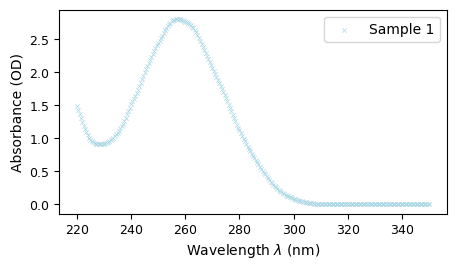

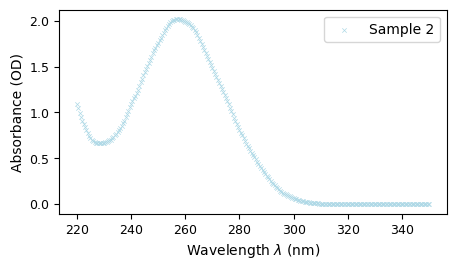

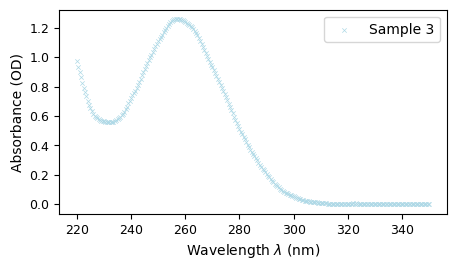

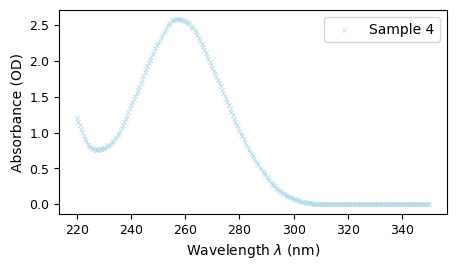

In [10]:
plot_1 = test_nano.plot_sample("Sample 1", color="lightblue")
plot_2 = test_nano.plot_sample("Sample 2", color="lightblue")
plot_3 = test_nano.plot_sample("Sample 3", color="lightblue")
plot_4 = test_nano.plot_sample("Sample 4", color="lightblue")
#plot_1.savefig("nano_plot.png", dpi=300, bbox_inches = 'tight')

TypeError: float() argument must be a string or a number, not 'Figure'

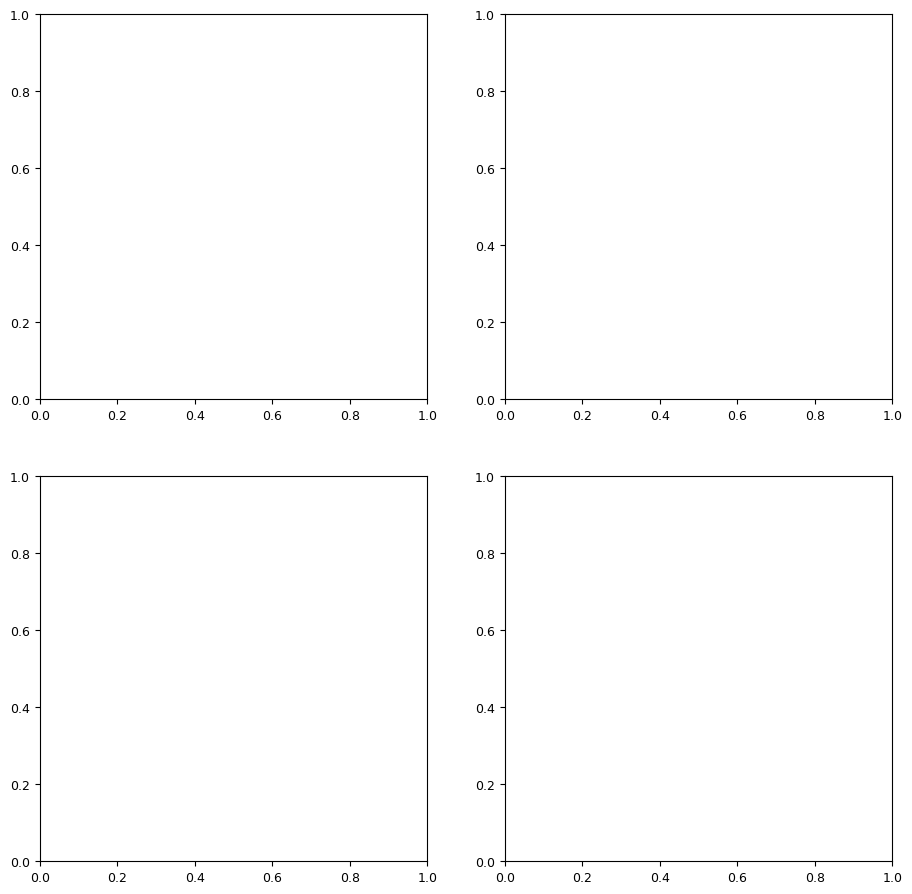

In [12]:
plot_all = test_nano.plot_all_samples()

# <u> Calculations</u>

The calculated corrections for bleedtrough, direct excitation and FRET were taken from
 
    Börner R, Kowerko D, Hadzic MCAS, König SLB, Ritter M, et al. (2018)
    Simulations of camera-based single-molecule fluorescence experiments. PLOS ONE 13(4): e0195277.
    https://doi.org/10.1371/journal.pone.0195277